In [3]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.
from pathlib import Path
import glob
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import random
import pickle
import os
import config
import data
import random
from natsort import natsorted
import lfp
import gym
arm = 'UR5'

TEST_DATASET = "UR5_slow_gripper_test" 
print('Using local setup')
WORKING_PATH = Path().absolute().parent
print(f'Working path: {WORKING_PATH}')
os.chdir(WORKING_PATH)
STORAGE_PATH = WORKING_PATH
print(f'Storage path: {STORAGE_PATH}')

TRAIN_DATA_PATHS = [STORAGE_PATH/'data'/x for x in ["UR5"]]
TEST_DATA_PATH = STORAGE_PATH/'data'/TEST_DATASET

C:\Users\sholt\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\sholt\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

Using local setup
Working path: C:\Users\sholt\Desktop\robotics\learning_from_play
Storage path: C:\Users\sholt\Desktop\robotics\learning_from_play


In [4]:
import roboticsPlayroomPybullet

In [5]:
env = gym.make('UR5PlayAbsRPY1Obj-v0')
env.render('human')
_ = env.reset()
env.render('playback')

current_dir=c:\users\sholt\desktop\roboticsplayroompybullet\roboticsPlayroomPybullet\envs
current_dir=c:\users\sholt\desktop\roboticsplayroompybullet\roboticsPlayroomPybullet\envs
current_dir=c:\users\sholt\desktop\roboticsplayroompybullet\roboticsPlayroomPybullet\envs


C:\Users\sholt\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


c:\users\sholt\desktop\roboticsplayroompybullet\roboticsPlayroomPybullet\envs


In [26]:
env.instance.calc_state()['observation'][0:7]

array([ 1.91859640e-02,  1.93180365e-01,  2.74787746e-01,  3.51946918e-03,
        7.92439662e-03,  2.51183190e-04, -7.02553025e-06])

In [40]:
env.step(np.array([ -1.91859640e-02,  1.93180365e-01,  0.2,  0.0,
        0.0,  0.0, -7.02553025e-06]))

({'obs_quat': array([-1.9126343e-02,  1.9318892e-01,  1.9970429e-01, -1.8149594e-04,
         -5.0490414e-04, -5.2041714e-06,  9.9999988e-01, -5.9260387e-06,
          1.3401778e-01,  1.8622158e-01,  4.4226092e-03, -4.4447567e-02,
         -5.8028689e-03,  7.2663355e-01,  6.8556142e-01, -2.2612239e-17,
          0.0000000e+00,  2.9999979e-02,  0.0000000e+00], dtype=float32),
  'achieved_goal': array([ 1.3401778e-01,  1.8622158e-01,  4.4226092e-03, -4.4447567e-02,
         -5.8028689e-03,  7.2663355e-01,  6.8556142e-01, -2.2612239e-17,
          0.0000000e+00,  2.9999979e-02,  0.0000000e+00], dtype=float32),
  'desired_goal': array([ 5.7584226e-02,  1.9058852e-01, -2.3273535e-05,  6.3586350e-14,
          4.4262686e-14,  7.0710677e-01,  7.0710677e-01, -2.2612239e-17,
          0.0000000e+00,  1.1222222e-02,  8.9771855e-01], dtype=float32),
  'controllable_achieved_goal': array([-1.9126343e-02,  1.9318892e-01,  1.9970429e-01, -5.9260387e-06],
        dtype=float32),
  'full_positional_st

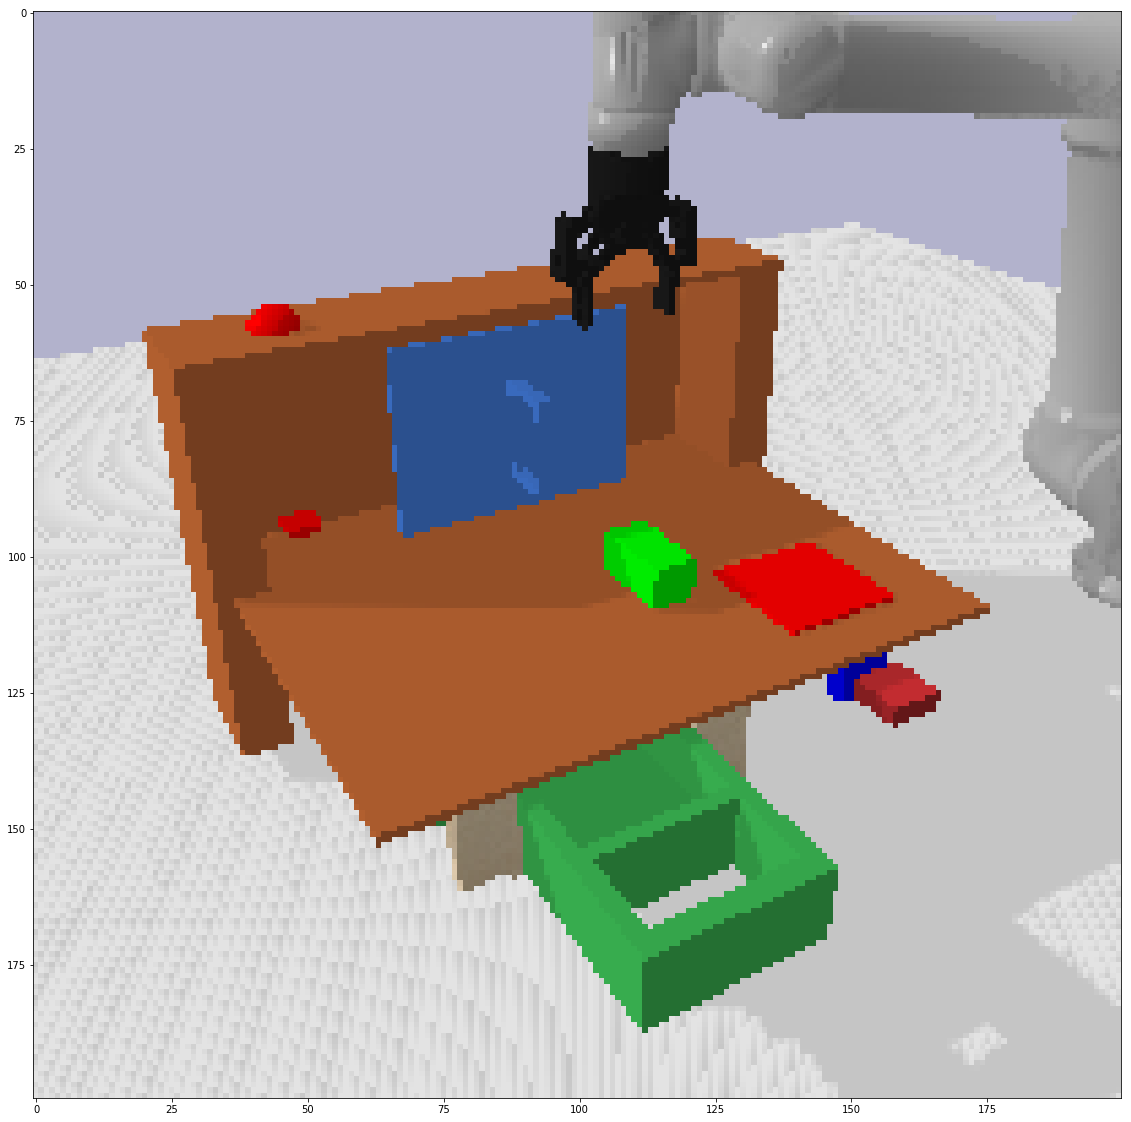

In [7]:
plt.figure(figsize = (20,20))
plt.imshow(env.instance.calc_state()['img'][:,:,:])

# Replays the teleop data

- This little loop of code replays the teleop data, and optionally saves the images to create an image dataset
- Every 30 steps it resets state, because minor errors in the physics compound

In [8]:
TRAIN_DATA_PATHS

[WindowsPath('C:/Users/sholt/Desktop/robotics/learning_from_play/data/UR5')]

In [10]:
DIR = str(TRAIN_DATA_PATHS[0]) # glob/natsorted prefer strings
obs_act_path = DIR+'/obs_act_etc/'
o, a, ag = [], [], []
for demo in natsorted(os.listdir(obs_act_path)):
        traj = np.load(obs_act_path+demo+'/data.npz')
        print(demo, len(traj['obs']))
        o.append(traj['obs']), a.append(traj['acts']), ag.append(traj['achieved_goals'])
        
o, a, ag = np.vstack(o), np.vstack(a), np.vstack(ag)

0 3317
1 5878
2 4773
3 5688
4 12283
5 3063
6 4319
7 482
8 8002
9 1323
10 6606
11 5670
12 2698
13 2662
14 9329
15 17181
16 8502
17 527
18 7675
19 1123
20 7181
21 1160
22 3188
23 15387
24 2343
25 6046
26 12814
27 8403
28 10294
29 20149
30 7395
31 8501
32 5724
33 3008
34 988
35 2203
36 8409
37 8217
38 3509
39 5391
40 20472
41 1228
42 1538
43 11587
44 5593
45 2792
46 1248
47 3666
48 2955
49 3880
50 1988
51 1901


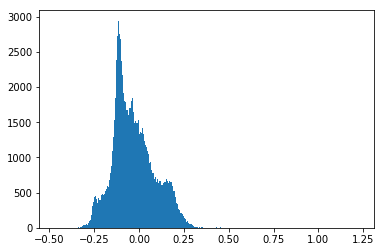

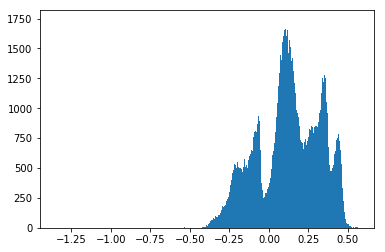

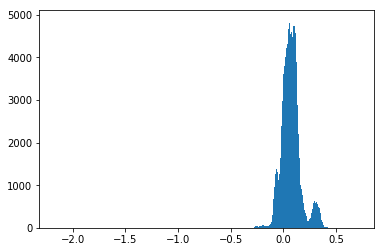

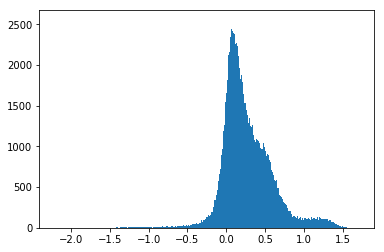

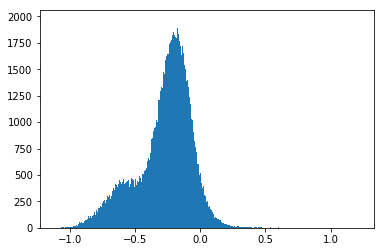

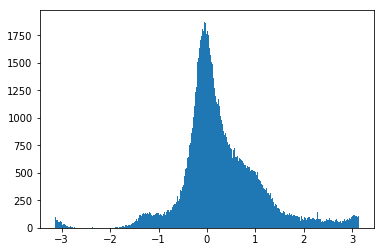

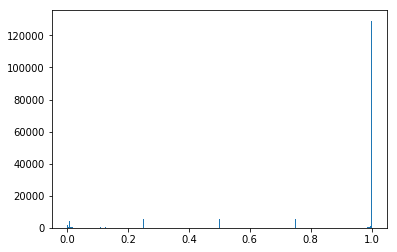

In [13]:
d = a
for i in range(0, d.shape[1]):
    plt.hist(d[:,i], bins=1000)
    #plt.xlim(-0.2,0.2)
    plt.show()

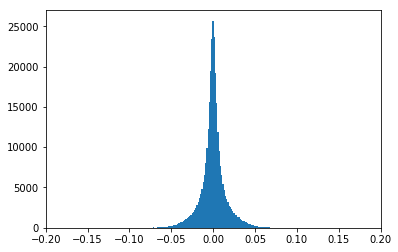

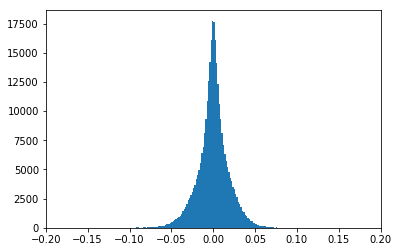

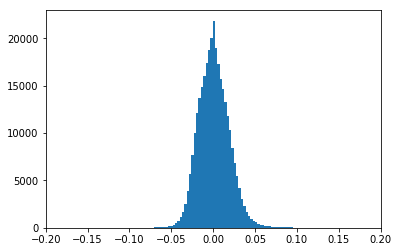

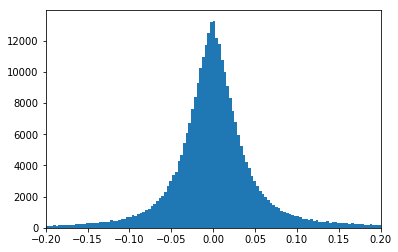

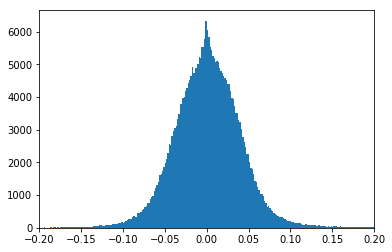

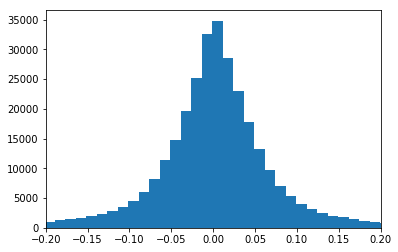

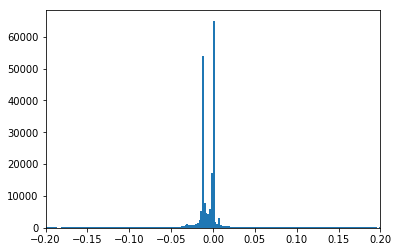

In [11]:
d = a - o[:, :7]
for i in range(0, d.shape[1]):
    plt.hist(d[:,i], bins=1000)
    plt.xlim(-0.2,0.2)
    plt.show()

In [ ]:
d = d[1:] - d[:-1]

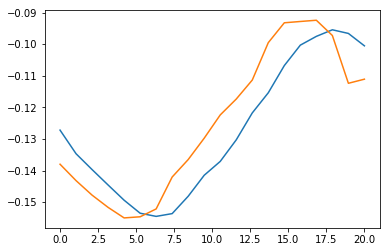

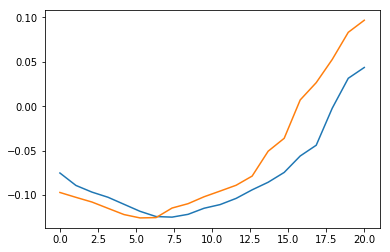

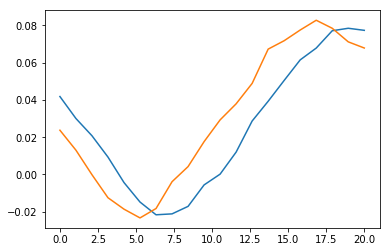

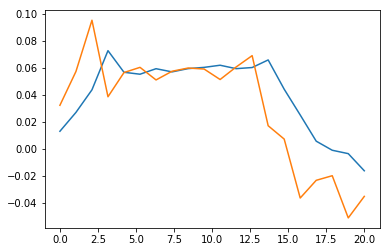

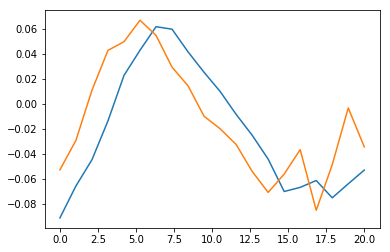

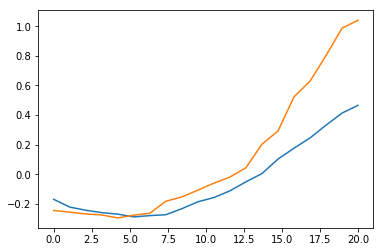

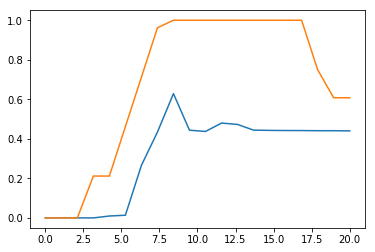

IndexError: index 7 is out of bounds for axis 1 with size 7

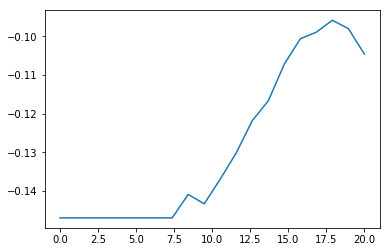

In [23]:
d = o[150000:150020]
f = a[150000:150020]
for i in range(0, d.shape[1]):
    plt.plot(np.linspace(0,len(d),len(d)), d[:,i])
    plt.plot(np.linspace(0,len(d),len(d)), f[:,i])
    plt.show()

In [8]:
import scipy.misc
from IPython.display import display, clear_output
keys = ['obs', 'acts', 'achieved_goals', 'joint_poses', 'target_poses', 'acts_quat', 'acts_rpy_rel',  'velocities', 'obs_quat']
# 
for DIR in TRAIN_DATA_PATHS:
    DIR = str(DIR) # glob/natsorted prefer strings
    obs_act_path = DIR+'/obs_act_etc/'

    for demo in natsorted(os.listdir(obs_act_path)):
        print(demo)
        
        start_points = natsorted(glob.glob(DIR+'/states_and_ims/'+str(demo)+'/env_states/*.bullet'))
        traj = np.load(obs_act_path+demo+'/data.npz')
        d = {k:traj[k] for k in keys}
        acts = d['acts']
        set_len = len(acts)

        start = 0 
        end= min(start+30, set_len)
        print(DIR+'/states_and_ims/'+str(demo)+'/ims')
        try:
            os.makedirs(DIR+'/states_and_ims/'+str(demo)+'/ims')
        except:
            pass
        for start_point in start_points:
            env.p.restoreState(fileName=start_point)
            env.panda.updateToggles() # need to do it when restoring, colors not carried over
            for i in range(start, end):
            
                o,r,_,_ = env.step(acts[i])

            start += 30
            end = min(start+30, set_len)



0
/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/0/ims


KeyboardInterrupt: 

In [4]:
import scipy.misc
from IPython.display import display, clear_output
keys = ['obs', 'acts', 'achieved_goals', 'joint_poses', 'target_poses', 'acts_quat', 'acts_rpy_rel',  'velocities', 'obs_quat', 'gripper_proprioception']
# 
for DIR in TRAIN_DATA_PATHS:
    obs_act_path = DIR/'obs_act_etc/'
    obs_act_path2 = DIR + 'obs_act_etc2/'
    

    for demo in natsorted(os.listdir(obs_act_path)):
        print(demo)
        
        start_points = natsorted(glob.glob(DIR+'/states_and_ims/'+str(demo)+'/env_states/*.bullet'))
        traj = np.load(obs_act_path+demo+'/data.npz')
        d = {k:traj[k] for k in keys}
        acts = d['acts']
        set_len = len(acts)

        start = 0 
        end= min(start+30, set_len)
        print(DIR+'/states_and_ims/'+str(demo)+'/ims')
        try:
            os.makedirs(DIR+'/states_and_ims/'+str(demo)+'/ims')
        except:
            pass
        for start_point in start_points:
            env.p.restoreState(fileName=start_point)
            env.panda.updateToggles() # need to do it when restoring, colors not carried over
            for i in range(start, end):
                
                #scipy.misc.imsave(DIR+'/states_and_ims/'+str(demo)+'/ims/'+str(i)+'.jpg', o['img'])
                o,r,_,_ = env.step(acts[i])
#                 clear_output(wait=True)
#                 fig = plt.imshow(scipy.misc.imread(DIR+'/states_and_ims/'+str(demo)+'/ims/'+str(i)+'.jpg'))
#                 plt.show()
                #time.sleep(0.05)

            start += 30
            end = min(start+30, set_len)

#         try:
#             os.makedirs(obs_act_path2+demo)
#         except:
#             pass
#         np.savez(obs_act_path2+demo+'/data', obs=d['obs'], acts=d['acts'], achieved_goals=d['achieved_goals'], 
#                 joint_poses=d['joint_poses'],target_poses=d['target_poses'], acts_quat=d['acts_quat'], 
#                               acts_rpy_rel=d['acts_rpy_rel'],  velocities = d['velocities'], 
#                               obs_quat=d['obs_quat'], gripper_proprioception=d['gripper_proprioception'])


    


FileNotFoundError: [Errno 2] No such file or directory: '../data/UR5/obs_act_etc/'

In [7]:
        
            
env.p.restoreState(fileName=path)
vid_path = 'output/videos/trajectory.mp4'
with imageio.get_writer(vid_path, mode='I') as writer:
    for i in range(start, start+WINDOW_SIZE):
        o ,r, d, _ = env.step(actions[i,:])
        writer.append_data(o['img'])
        clear_output(wait=True)
        fig = plt.imshow(o['img'])
        plt.show()

['/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/0.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/30.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/60.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/90.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/120.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/150.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/180.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/210.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/240.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/data/UR5/states_and_ims/21/env_states/270.bullet',
 '/home/sholto/Desktop/AI/learning_from_play/

In [20]:

keys = ['obs', 'acts', 'achieved_goals', 'joint_poses', 'target_poses', 'acts_quat', 'acts_rpy_rel',  'velocities', 'obs_quat', 'gripper_proprioception']

for DIR in [TRAIN_DATA_PATHS[1]]:
    
    obs_act_path = os.path.join(DIR, 'obs_act_etc/')

    for demo in natsorted(os.listdir(obs_act_path)):
        if int(demo)>18:
            print(demo)

            start_points = natsorted(glob.glob(str(DIR/'states_and_ims'/str(demo)/'env_states/*.bullet')))
            traj = np.load(obs_act_path+demo+'/data.npz')
            d = {k:traj[k] for k in keys}
            acts = d['acts']
            set_len = len(acts)

            start = 0 
            end= min(start+30, set_len)
            gripper_proprioception = []
            for start_point in start_points:
                env.p.restoreState(fileName=start_point)
                for i in range(start, end):
                    o,r,_,_ = env.step(acts[i])
                    #print(d['gripper_proprioception'][i])
                    time.sleep(0.015)

                start += 30
                end = min(start+30, set_len)



19
20
21
22
23
24


KeyboardInterrupt: 

In [3]:
#dataset, cnt = data.create_single_dataset(dataset_path)
def load_data(path, keys):
    dataset = {k:[] for k in keys+['sequence_index','sequence_id']}
    obs_act_path = os.path.join(path, 'obs_act_etc/')

    for demo in natsorted(os.listdir(obs_act_path)):
        print(demo)
        traj = np.load(obs_act_path+demo+'/data.npz')
        for k in keys:
            d = traj[k]
            if len(d.shape) < 2:
                d = np.expand_dims(d, axis = 1) # was N, should be N,1
                
            dataset[k].append(d.astype(np.float32))
        timesteps = len(traj['obs'])
        dataset['sequence_index'].append(np.arange(timesteps, dtype=np.int32).reshape(-1, 1))
        dataset['sequence_id'].append(np.full(timesteps, fill_value=int(demo), dtype=np.int32).reshape(-1, 1))

    # convert to numpy
    for k in keys+['sequence_index','sequence_id']:
        dataset[k] = np.vstack(dataset[k])
    return dataset


keys = ['obs', 'acts', 'achieved_goals', 'joint_poses', 'target_poses', 'acts_rpy', 'acts_rpy_rel',  'velocities', 'obs_rpy', 'obs_rpy_inc_obj', 'gripper_proprioception']
dataset = load_data(UR5, keys)
#transition_dataset = load_data(UR5_25, keys)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [3]:
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

In [130]:
scaling = np.array([256.0/4, 256.0/2]).astype(np.float32)

In [183]:
def logistic_mixture(inputs, quantized = True):
    weightings, mu, scale = inputs
    print(mu.shape, scaling.shape, scale.shape, weightings.shape)
    mu  = mu*np.expand_dims(scaling,1)
    print(mu)
    dist = tfd.Logistic(loc=mu, scale=scale)
    if quantized:
      dist = tfd.QuantizedDistribution(
                distribution=tfd.TransformedDistribution(
                    distribution=dist,
                    bijector=tfb.Shift(shift=-0.5)),
                low=-128.,
                high=128.
            )
    mixture_dist = tfd.MixtureSameFamily(
        mixture_distribution=tfd.Categorical(logits=weightings),
        components_distribution=dist,
        validate_args=True
    )
    print(mixture_dist)
    
    if quantized:
      quantized_scale = 1/scaling
      mixture_dist = tfd.TransformedDistribution(
          distribution=mixture_dist,
          bijector=tfb.Scale(scale=quantized_scale)
      )

    return mixture_dist

mu = np.array([[[-1.5, 0.4, 0.4],[-0.2, 0.3, 0.3]]]).astype(np.float32)
std = np.array([[[1.0,1.0,1],[1.0,1.0,1]]]).astype(np.float32)
weights = np.array([[[1,1,1],[1,1,1]]]).astype(np.float32)
m = logistic_mixture((weights,mu,std))

#m = logistic_mixture(([1], [0.06], [1]))

(1, 2, 3) (2,) (1, 2, 3) (1, 2, 3)
[[[-96.   25.6  25.6]
  [-25.6  38.4  38.4]]]
tfp.distributions.MixtureSameFamily("MixtureSameFamily", batch_shape=[1, 2], event_shape=[], dtype=float32)


In [184]:
m.sample()

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-1.53125  ,  0.2890625]], dtype=float32)>

In [185]:
samples = np.array([m.sample().numpy() for i in range(0,100)])
samples.shape


(100, 1, 2)

In [186]:
samples[:,0]

array([[ 0.375    ,  0.2734375],
       [ 0.40625  , -0.1796875],
       [ 0.390625 , -0.2109375],
       [ 0.375    ,  0.265625 ],
       [ 0.390625 , -0.2109375],
       [ 0.390625 ,  0.296875 ],
       [ 0.359375 ,  0.296875 ],
       [ 0.421875 ,  0.3046875],
       [ 0.40625  , -0.2109375],
       [ 0.40625  ,  0.28125  ],
       [ 0.453125 , -0.2109375],
       [ 0.359375 , -0.1953125],
       [ 0.328125 ,  0.3203125],
       [ 0.40625  ,  0.3046875],
       [ 0.40625  ,  0.2734375],
       [ 0.421875 , -0.1953125],
       [-1.5      ,  0.296875 ],
       [-1.53125  ,  0.2890625],
       [-1.484375 ,  0.3125   ],
       [-1.484375 , -0.1875   ],
       [ 0.375    ,  0.3125   ],
       [-1.53125  , -0.171875 ],
       [-1.5      ,  0.3125   ],
       [ 0.40625  ,  0.3203125],
       [-1.484375 ,  0.296875 ],
       [ 0.421875 ,  0.3125   ],
       [-1.53125  ,  0.296875 ],
       [ 0.421875 ,  0.28125  ],
       [ 0.40625  , -0.203125 ],
       [-1.421875 ,  0.3125   ],
       [ 0

(array([ 2.,  1.,  5., 10.,  8.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  3.,  3., 10., 34., 13.,  3.,  4.]),
 array([-1.578125  , -1.5576563 , -1.5371875 , -1.5167187 , -1.49625   ,
        -1.4757812 , -1.4553125 , -1.4348438 , -1.414375  , -1.3939062 ,
        -1.3734375 , -1.3529687 , -1.3325    , -1.3120313 , -1.2915626 ,
        -1.2710937 , -1.250625  , -1.2301563 , -1.2096875 , -1.1892188 ,
        -1.16875   , -1.1482812 , -1.1278125 , -1.1073438 , -1.086875  ,
        -1.0664062 , -1.0459375 , -1.0254687 , -1.005     , -0.984531

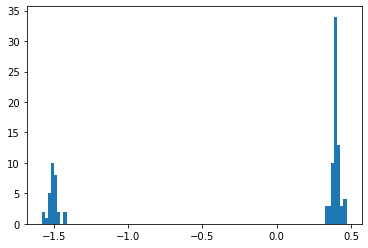

In [187]:
plt.hist(np.array(samples[:,:,0]), bins=100)

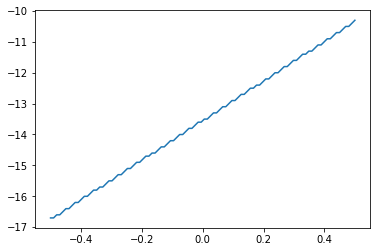

In [18]:
plt.plot(np.linspace(-0.5, 0.5, 100),m.log_prob(np.linspace(-0.5, 0.5, 100)))

In [16]:
# Coverage analysis

np.set_printoptions(suppress=True)
ag = dataset['achieved_goals']
t_ag = transition_dataset['achieved_goals']


23908
27546


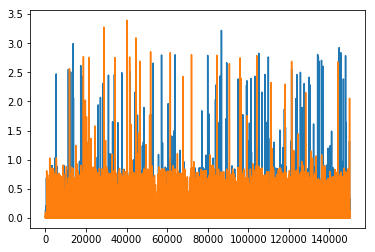

In [39]:
def see_diff(ag):
    diff_ag = abs(np.sum(ag[1:]-ag[:-1],axis = -1))
    print(sum(diff_ag == 0))
    
    plt.plot(diff_ag)
    
see_diff(ag[:150000])
see_diff(t_ag[:150000])

In [40]:
mins = np.min(dataset['achieved_goals'], axis = 0)
maxes = np.max(dataset['achieved_goals'], axis = 0)
bins = np.linspace(mins,maxes+0.01, 11)

idx = 0
qs = []
for idx in range(0,ag.shape[1]):
    quantiles = np.digitize(dataset['achieved_goals'][:,idx], bins[:,idx])
    qs.append(quantiles)
qs = np.array(qs).T
qs.shape
np.unique(qs, axis=0).shape[0]

In [42]:
from tqdm import tqdm
step2 = []
count2 = []
for i in tqdm(np.linspace(1, len(qs), 10)):
    
    i = int(i)
    step2.append(i)
    
    count2.append(np.unique(qs[:i], axis=0).shape[0])

30351

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.30it/s]


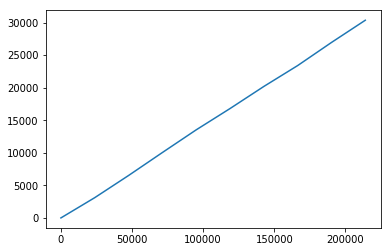

In [44]:
import matplotlib.pyplot as plt
#plt.plot(step, count)
plt.plot(step2, count2)

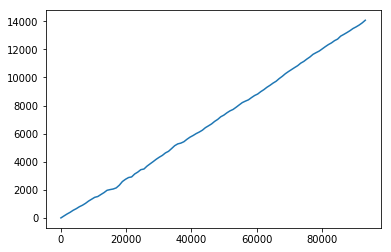

In [84]:
import matplotlib.pyplot as plt
plt.plot(step, count)

In [ ]:
d['']

In [38]:
print(obs_act_path2+demo)

try:
    os.makedirs(obs_act_path2+demo)
except:
    pass
np.savez(obs_act_path2+demo+'/data', obs=d['obs'], acts=d['acts'], achieved_goals=d['achieved_goals'], 
        joint_poses=d['joint_poses'],target_poses=d['target_poses'], acts_rpy=d['acts_rpy'], 
                      acts_rpy_rel=d['acts_rpy_rel'],  velocities = d['velocities'], 
                      obs_rpy=d['obs_rpy'], gripper_proprioception=d['gripper_proprioception'])

data_collection/collected_data/UR5_25HzNG/obs_act_etc2/0


In [30]:
d['obs']

TypeError: 'bool' object is not subscriptable

In [41]:
np.load(obs_act_path2+demo+'/data.npz', allow_pickle=True)['obs']

array([[ 0.04723324,  0.0997171 ,  0.25966173, ...,  0.        ,
         0.0232    ,  0.        ],
       [ 0.05077564,  0.10356043,  0.26043293, ...,  0.        ,
         0.02550222,  0.        ],
       [ 0.05277815,  0.11694828,  0.2672537 , ...,  0.        ,
         0.02794422,  0.        ],
       ...,
       [ 0.08924661,  0.07980861,  0.20844524, ..., -0.12654033,
         0.03      ,  0.        ],
       [ 0.0872113 ,  0.07491604,  0.21016541, ..., -0.12654033,
         0.03      ,  0.        ],
       [ 0.08501004,  0.06547531,  0.21349524, ..., -0.12654033,
         0.03      ,  0.        ]], dtype=float32)

In [13]:
os.make_dirs(obs_act_path2)

AttributeError: module 'os' has no attribute 'make_dirs'

In [29]:
env.step(acts[i])

({'observation': array([-1.1417490e-01, -1.1603500e-01, -7.2682530e-02,  1.4856871e-02,
          5.8717191e-02, -8.6630203e-02,  9.9439770e-01,  6.1822504e-01,
         -7.8842722e-02,  1.4684063e-01, -1.0000030e-05,  2.8552333e-01,
          9.5837176e-01, -2.0367794e-10, -1.4987091e-10,  5.1898640e-02,
         -2.9461542e-02,  2.9999999e-02,  0.0000000e+00], dtype=float32),
  'achieved_goal': array([-7.8842722e-02,  1.4684063e-01, -1.0000030e-05,  2.8552333e-01,
          9.5837176e-01, -2.0367794e-10, -1.4987091e-10,  5.1898640e-02,
         -2.9461542e-02,  2.9999999e-02,  0.0000000e+00], dtype=float32),
  'desired_goal': array([-0.10332257,  0.29181015,  0.06587092], dtype=float32),
  'controllable_achieved_goal': array([-0.1141749 , -0.116035  , -0.07268253,  0.61822504], dtype=float32),
  'full_positional_state': array([-1.1417490e-01, -1.1603500e-01, -7.2682530e-02,  1.4856871e-02,
          5.8717191e-02, -8.6630203e-02,  9.9439770e-01,  6.1822504e-01,
         -7.8842722e-0

In [16]:
print(start_points)

['data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/0.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/30.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/60.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/90.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/120.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/150.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/180.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/210.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/240.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/270.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_states/300.bullet', 'data_collection/collected_data/UR5_25HzNG//states_and_ims/1/env_stat

In [8]:
rpy_obs = 'obs_rpy' #'rpy_obs'
def load_data(path, keys):
    dataset = {k:[] for k in keys+['sequence_index','sequence_id']}
    obs_act_path = os.path.join(path, 'obs_act_etc/')

    for demo in natsorted(os.listdir(obs_act_path)):
        print(demo)
        traj = np.load(obs_act_path+demo+'/data.npz')
        for k in keys:
            dataset[k].append(traj[k].astype(np.float32))
        timesteps = len(traj['obs'])
        dataset['sequence_index'].append(np.arange(timesteps, dtype=np.int32).reshape(-1, 1))
        dataset['sequence_id'].append(np.full(timesteps, fill_value=int(demo), dtype=np.int32).reshape(-1, 1))

    # convert to numpy
    for k in keys+['sequence_index','sequence_id']:
        dataset[k] = np.vstack(dataset[k])
    return dataset

In [5]:
keys = ['obs', 'acts', 'achieved_goals', 'joint_poses', 'target_poses', 'acts_rpy', 'acts_rpy_rel',  'velocities', 'obs_rpy']
dataset = load_data(PYBULLET_DATA_DIR, keys)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [2]:
obs_act_path = os.path.join(path, 'obs_act_etc/')

starts = []
idxs = []
fs = []

for f in natsorted(os.listdir(obs_act_path)):
    potential_start_points = glob.glob(TEST_DIR+'/states_and_ims/'+str(f)+'/env_states/*.bullet')
    potential_start_idxs = [int(x.replace('.bullet','').replace(f"{TEST_DIR}/states_and_ims/{str(f)}/env_states/", "")) for x in potential_start_points]
    folder = [f]*len(potential_start_idxs)
    [starts.append(x) for x in potential_start_points], [idxs.append(x) for x in potential_start_idxs], [fs.append(x) for x in folder]

In [4]:
descriptions = {
    1: 'lift up',
    2: 'take down',
    3: 'door left',
    4: 'door right',
    5: 'drawer in',
    6: 'drawer out',
    7: 'pick place',
    8: 'press button',
    9: 'dial on',
    10: 'dial off',
    11: 'rotate block left',
    12: 'rotate block right',
    13: 'stand up block',
    14: 'knock down block',
    15: 'block in cupboard right',
    16: 'block in cupboard left',
    17: 'block in drawer',
    18: 'block out of drawer',
    19: 'block out of cupboard right',
    20: 'block out of cupboard left',
}



In [6]:
trajectory_labels = {}

done = []

In [12]:
import time
for i in range(0,len(starts)):
    
    if starts[i] not in done:
    
        data = np.load(TEST_DIR+'obs_act_etc/'+str(fs[i])+'/data.npz')
        traj_len = 40#random.randint(40,50)
        end = min(len(data['acts'])-1,idxs[i]+traj_len )
        acts = data['acts_rpy'][idxs[i]:end]
        value = "r"
        while value == "r":
            env.p.restoreState(fileName=starts[i])
            for a in range(0, len(acts)):
                env.step(acts[a])
                time.sleep(0.01)
            value = input("Label:")
            if value == 's':
                break
            elif value == 'r':
                pass
            else:
                trajectory_labels[starts[i]] = descriptions[int(value)]

        done.append(starts[i])
        np.savez("trajectory_labels", trajectory_labels=trajectory_labels, done=done)
        
    
    

Label:s
Label:8
Label:s
Label:s
Label:17
Label:15
Label:s
Label:13
Label:6
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:5
Label:s
Label:2
Label:r
Label:s
Label:s
Label:s
Label:1
Label:2
Label:s
Label:s
Label:s
Label:s
Label:3
Label:1
Label:s
Label:1
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:19
Label:2
Label:s
Label:s
Label:s
Label:s
Label:s
Label:13
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:8
Label:s
Label:s
Label:s
Label:s
Label:7
Label:s
Label:s
Label:12
Label:s
Label:s
Label:1
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:8
Label:7
Label:s
Label:2
Label:s
Label:s
Label:1
Label:8
Label:s
Label:12
Label:s
Label:s
Label:s
Label:s
Label:s
Label:7
Label:18
Label:s
Label:s
Label:s
Label:4
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:8
Label:1
Label:s
Label:s
Label:s
Label:19
Label:s
Label:s
Label:s
Label:s
Label:s
Label:s
Label:8
Label:12
Label:s
Label:13
Label:14
Labe

In [11]:
len(starts)

514

In [30]:
for k,v in trajectory_labels.items():
    if v == 'knock':
        trajectory_labels[k] = 'knock down block'

In [36]:
starts[i]

'data_collection/collected_data/UR5_25Hz_test_suite//states_and_ims/0/env_states/1410.bullet'

In [8]:
left = np.load(TEST_DIR+'left_right.npz')['left']
right = np.load(TEST_DIR+'left_right.npz')['right']

In [49]:
left_complete = []
right_complete = []

for pth in left:
    f = pth.split('/')[7]
    i = pth.split('/')[9].replace('.bullet', '')
    data = np.load(TEST_DIR+'obs_act_etc/'+f+'/data.npz')
    o = data['obs'][int(i):int(i)+40]
    a = data['acts_rpy'][int(i):int(i)+40]
    pth = pth.replace('/content/drive/My Drive/Robotic Learning/UR5_25Hz_test_suite/', TEST_DIR) 
    left_complete.append((pth, o, a))
    
for pth in right:
    f = pth.split('/')[7]
    i = pth.split('/')[9].replace('.bullet', '')
    data = np.load(TEST_DIR+'obs_act_etc/'+f+'/data.npz')
    o = data['obs'][int(i):int(i)+40]
    a = data['acts_rpy'][int(i):int(i)+40]
    pth = pth.replace('/content/drive/My Drive/Robotic Learning/UR5_25Hz_test_suite/', TEST_DIR) 
    right_complete.append((pth, o, a))
    

    

In [61]:
for i in range(0,50):
    pth, obs, acts = left_complete[np.random.choice(len(left_complete))]
    env.p.restoreState(fileName=pth)
    for a in range(0, len(acts)):
        env.step(acts[a])
        time.sleep(0.001)

In [62]:
for i in range(0,50):
    pth, obs, acts = right_complete[np.random.choice(len(right_complete))]
    env.p.restoreState(fileName=pth)
    for a in range(0, len(acts)):
        env.step(acts[a])
        time.sleep(0.001)

In [65]:
obs_left = np.array([x[1] for x in left_complete])
obs_right = np.array([x[1] for x in right_complete])

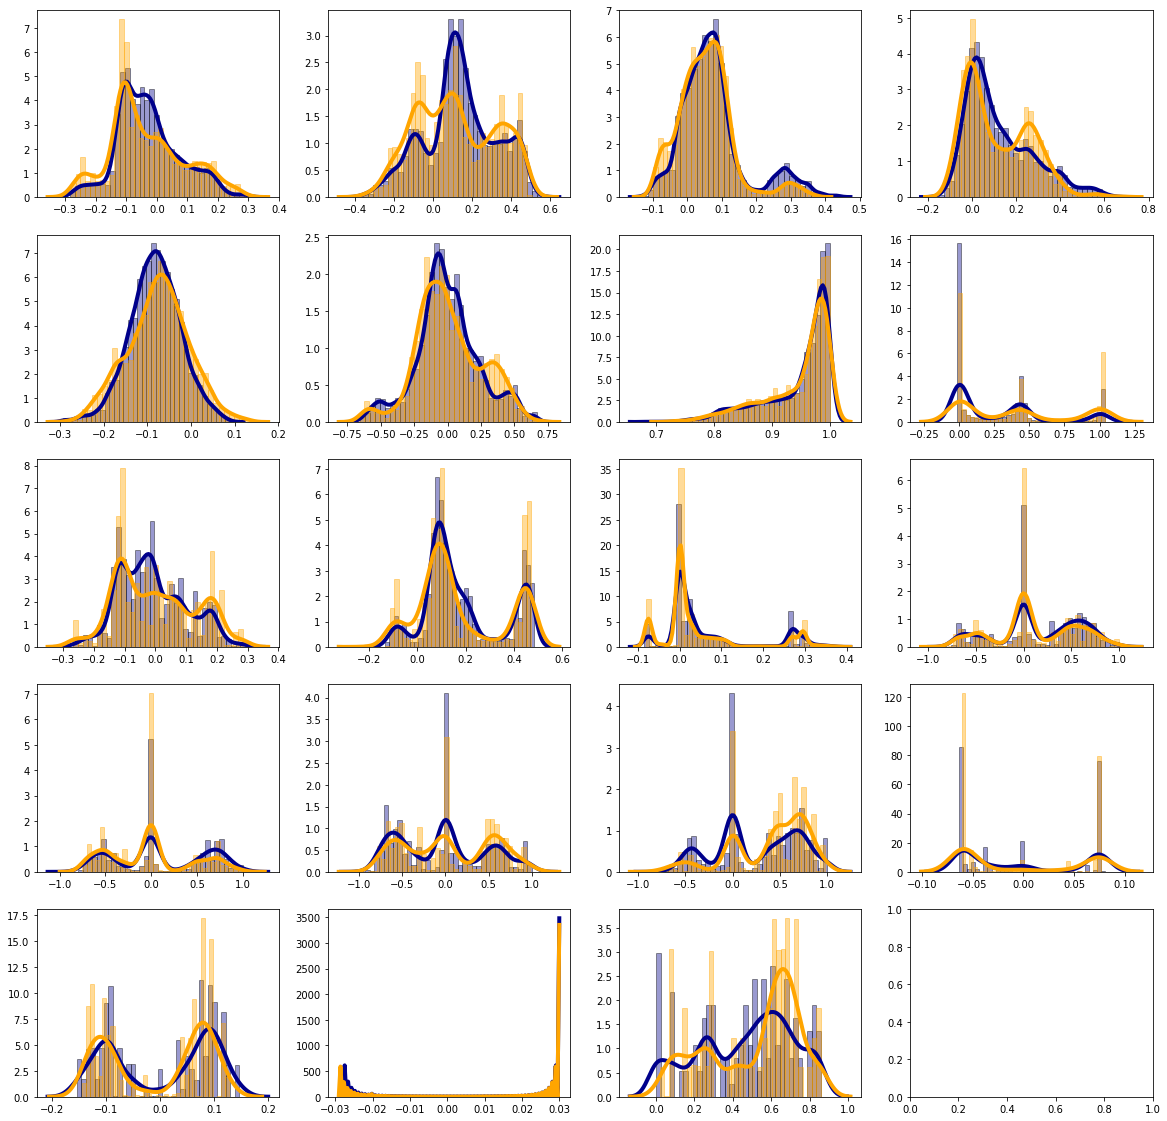

In [91]:
import seaborn as sns
fig, axs = plt.subplots(ncols=4, nrows=5,figsize=(20, 20),)

for x in range(0, obs_left.shape[2]):
    shape = obs_left.shape
    sns.distplot(np.reshape(obs_left[:], [shape[0] * shape[1], shape[2]])[:,x], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axs[mapping[x][0], mapping[x][1]])
    shape = obs_right.shape
    sns.distplot(np.reshape(obs_right[:], [shape[0] * shape[1], shape[2]])[:,x], hist=True, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth': 4}, ax=axs[mapping[x][0], mapping[x][1]])
    
plt.show()

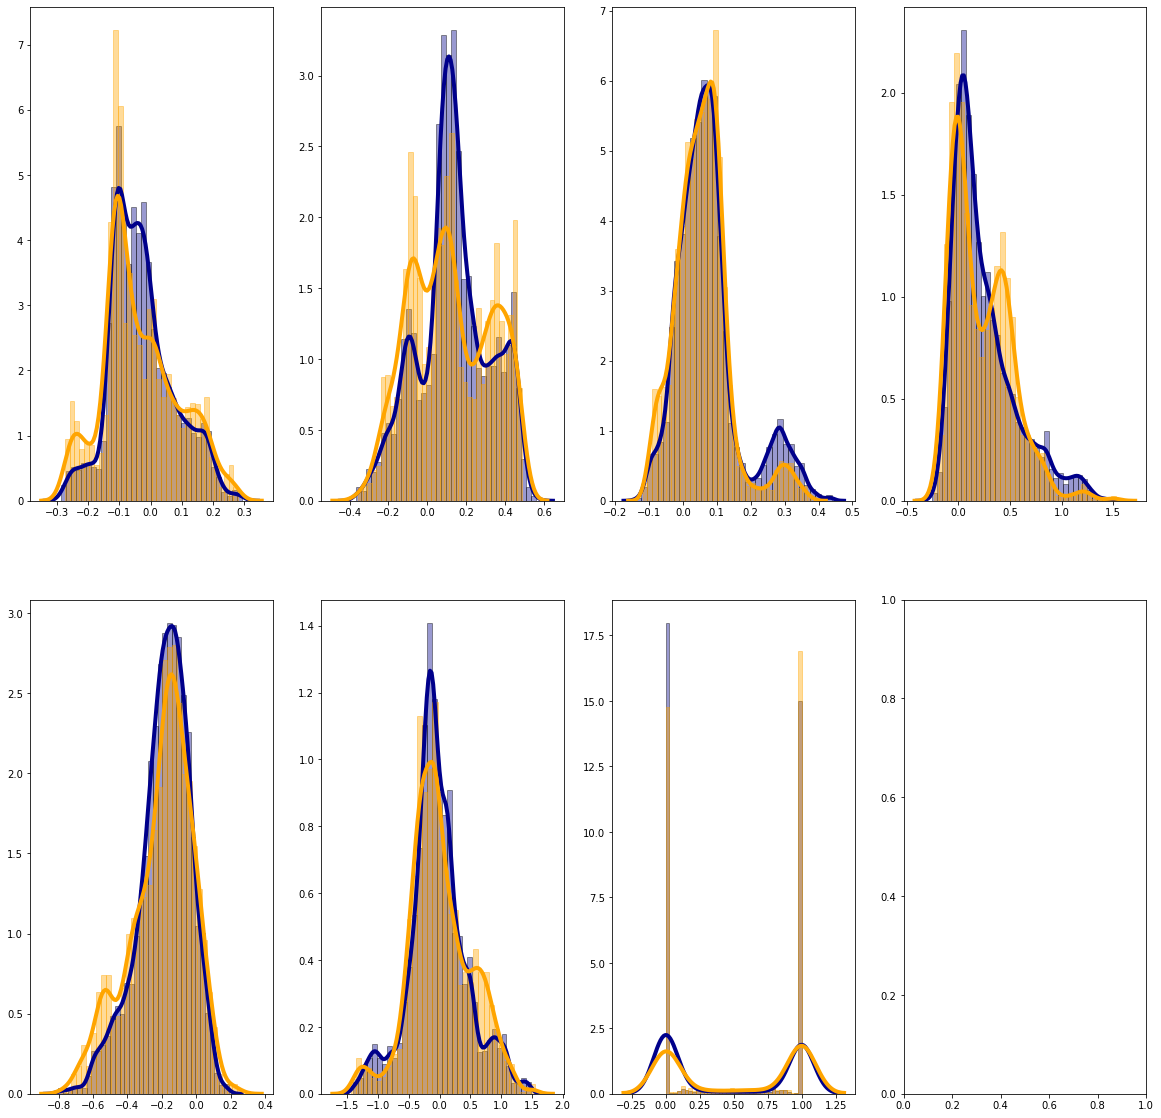

In [93]:
acts_left = np.array([x[2] for x in left_complete])
acts_right = np.array([x[2] for x in right_complete])
import seaborn as sns
fig, axs = plt.subplots(ncols=4, nrows=2,figsize=(20, 20),)

for x in range(0, acts_left.shape[2]):
    shape = acts_left.shape
    sns.distplot(np.reshape(acts_left[:], [shape[0] * shape[1], shape[2]])[:,x], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axs[mapping[x][0], mapping[x][1]])
    shape = acts_right.shape
    sns.distplot(np.reshape(acts_right[:], [shape[0] * shape[1], shape[2]])[:,x], hist=True, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth': 4}, ax=axs[mapping[x][0], mapping[x][1]])
    
plt.show()

In [84]:
mapping = []
for i in range(0,5):
    for j in range(0,4):
        mapping.append([i,j])
        
        

mapping

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3]]

In [87]:
obs_left.shape[2]-1

18

In [ ]:
arm_pos = [0.29, -0.01, 0.51]

b=  [0.25, 0.11, 0.02]

realsense_y= translation[2]  - bb[0]
realsense_x = translation[1] - bb[1]
realsense_z = translation[0] - bb[2]

(0.0, 480.0)

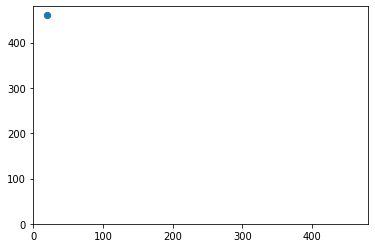

In [7]:
# Testing camera transforms
camera_coord = (20,20)
plt.scatter(camera_coord[0], 480-camera_coord[1], s=40)
plt.xlim(0,480)
plt.ylim(0,480)

In [28]:
import math
def gripper_frame_to_robot_frame(x,y, angle):
        y=-y
        X = x*math.cos(angle) - y*math.sin(angle)
        Y = x*math.sin(angle) + y*math.cos(angle)
        return X, Y

In [30]:
current_angle = 0.22
gripper_frame_to_robot_frame(0.02,-0.02, math.pi/2)

(-0.02, 0.02)

In [3]:
path  = os.getcwd()+ '/sapien_simulator/config/ur5e.srdf'   # '/ocrtoc_task/urdf/ur5e.urdf'
p.loadURDF(path)

error: Cannot load URDF file.

In [9]:
height = 

True

In [11]:

os.path.exists(path)

True

In [ ]:
# Testing that diversity does increase with more training data
t_it = iter(train_dataset)
mins = np.min(dataset['obs_rpy'], axis = 0)
maxes = np.max(dataset['obs_rpy'], axis = 0)
shape = dataset['obs_rpy'].shape[1]
bins = np.linspace(mins,maxes+0.01, 11)


def get_quantisation(ags, bins):
    qs = []
    for idx in range(0 , shape):
      quantiles = np.digitize(ags[:, idx], bins[:,idx])
      qs.append(quantiles)
    return np.array(qs).T



batch = t_it.next()
o = tf.reshape(batch['obs'][:,:,:], (-1, OBS_DIM))
coverage = get_quantisation(o, bins)

shapes = []
for i in range(0,10):
  batch = t_it.next()
  o = tf.reshape(batch['obs'][:,:,:], (-1, OBS_DIM))
  c = get_quantisation(o, bins)
  coverage = np.unique(np.concatenate([coverage, c], 0), axis = 0)
  shapes.append(coverage.shape[0])


np.unique(get_quantisation(dataset['obs_rpy'], bins), axis = 0).shape

plt.plot([120215]*11)
plt.plot(old)
plt.plot(shapes)
plt.plot(one)

plt.title("Unique states observed in batches with shuffle size N")
plt.legend(['Unique values', 40, 10, 1])